#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

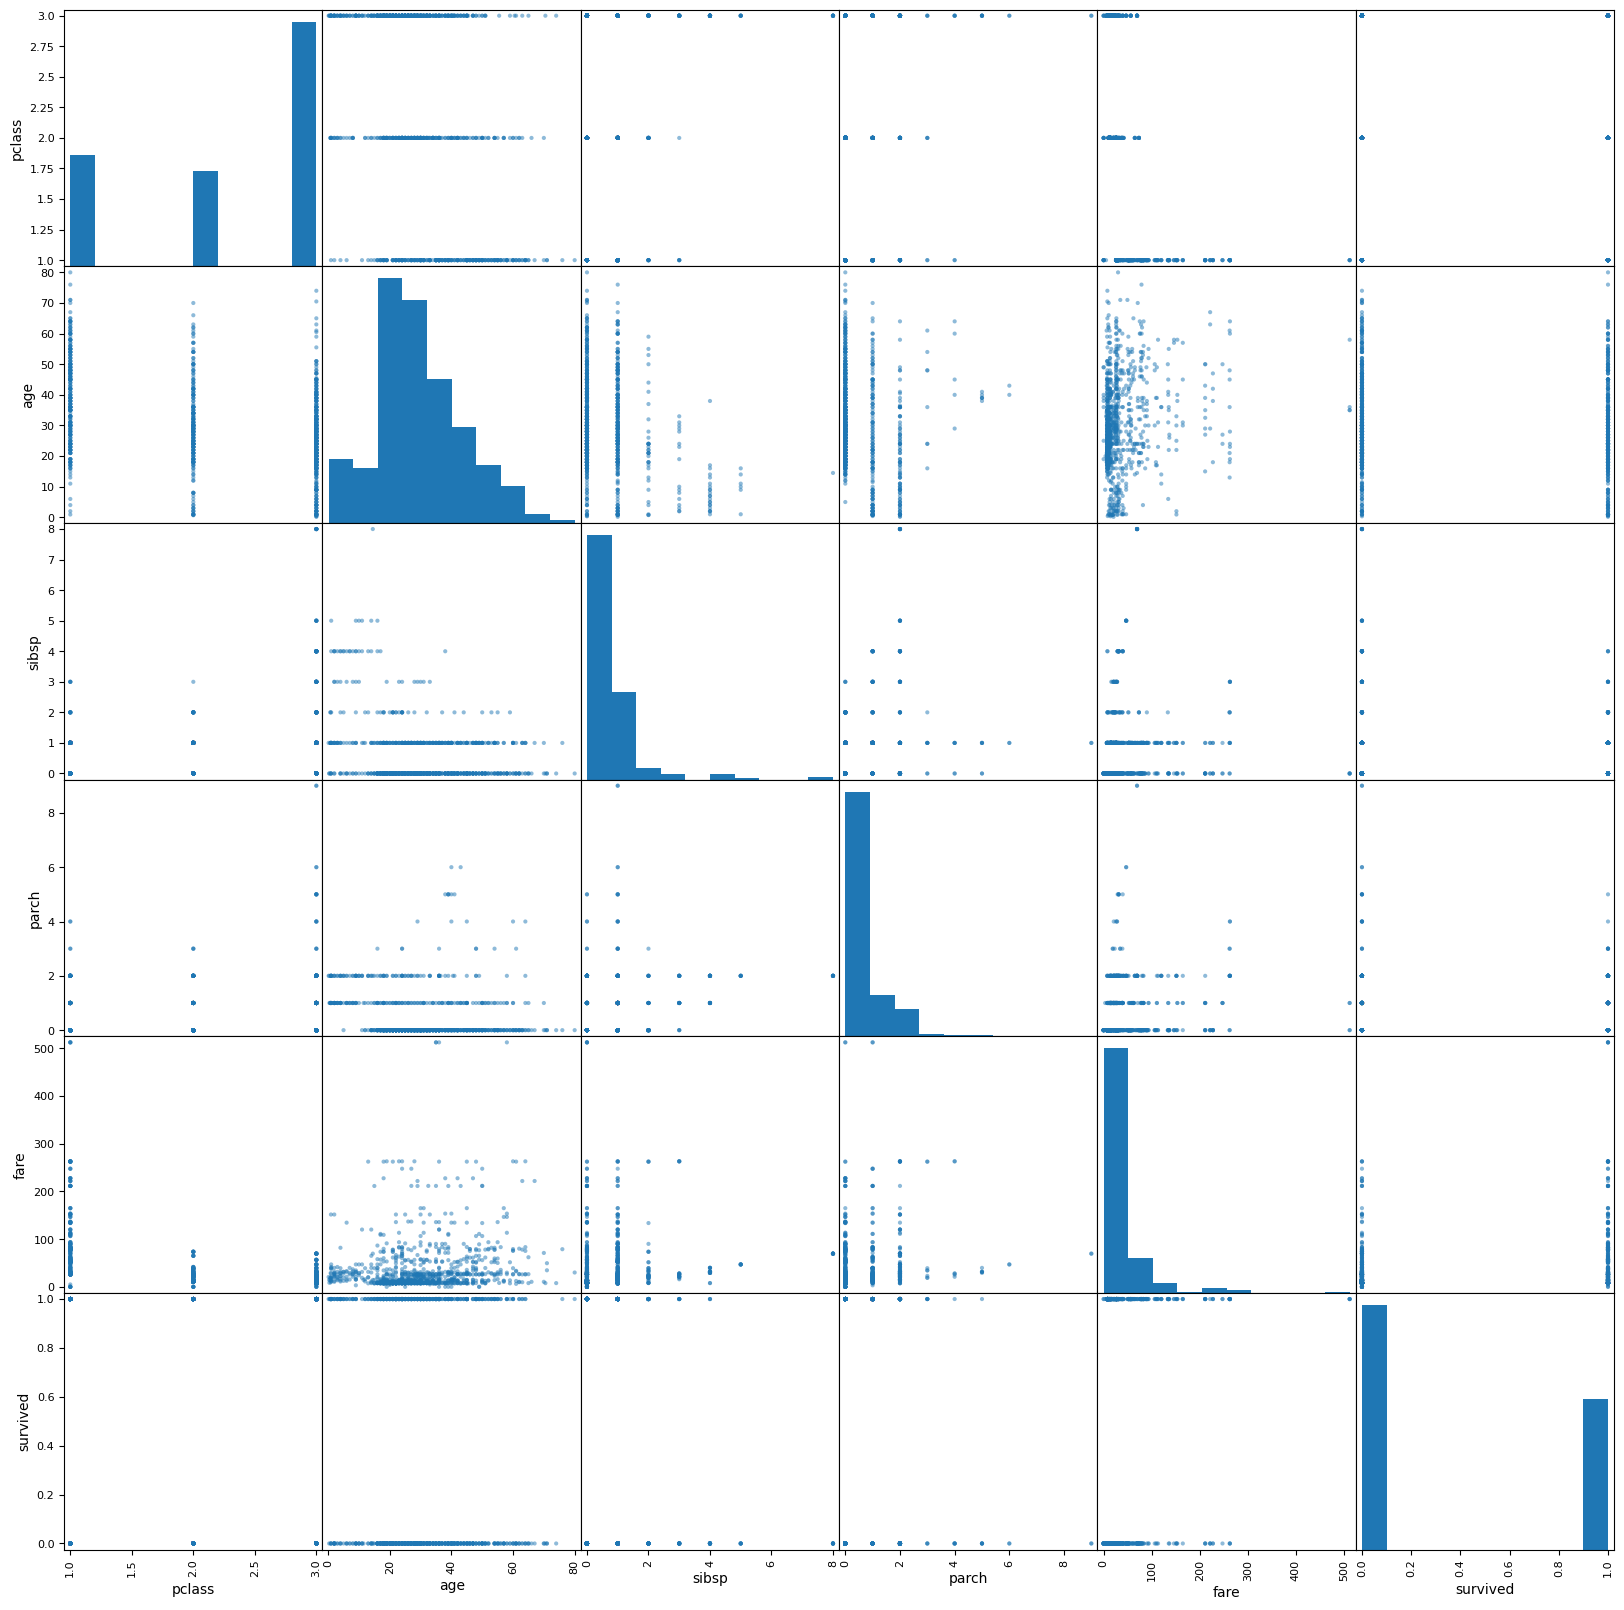

In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


titanic_df = pd.read_csv('/workspaces/707-aml-lecture-notes-rishikesh-2809/2-week2/data/titanic.csv')
pd.plotting.scatter_matrix(titanic_df, figsize=(20,20))
plt.show()


In [5]:
titanic_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

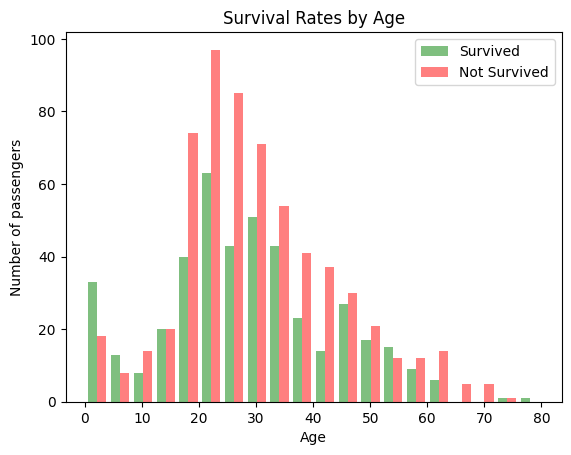

In [8]:
import matplotlib.pyplot as plt

survived = titanic_df[titanic_df['survived'] == 1]
not_survived = titanic_df[titanic_df['survived'] == 0]

plt.hist([survived['age'], not_survived['age']], bins=20, alpha=0.5, label=['Survived', 'Not Survived'], color=['green', 'red'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Survival Rates by Age')
plt.legend()
plt.show()


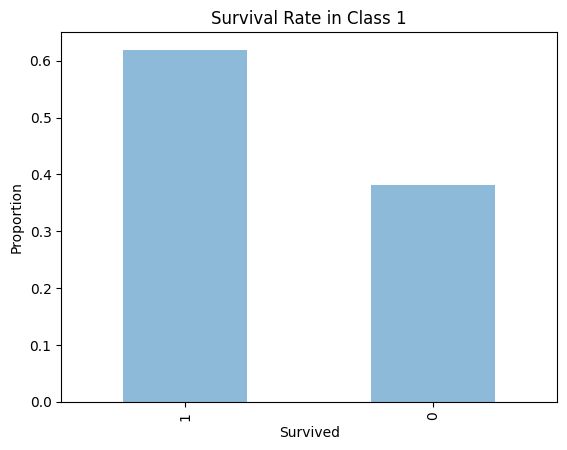

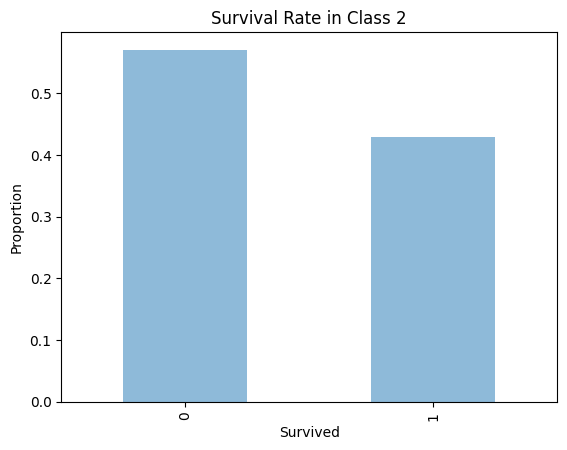

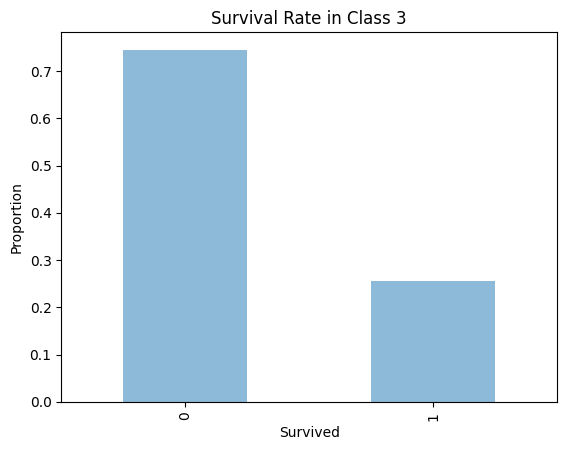

In [7]:

for pclass in titanic_df['pclass'].unique():
    titanic_df[titanic_df['pclass'] == pclass]['survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
    plt.title(f'Survival Rate in Class {pclass}')
    plt.xlabel('Survived')
    plt.ylabel('Proportion')
    plt.show()


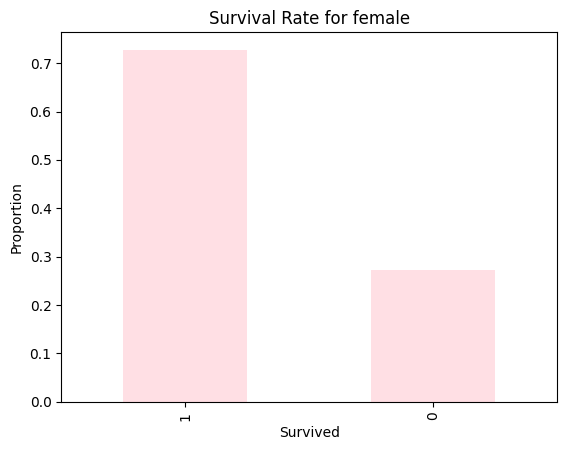

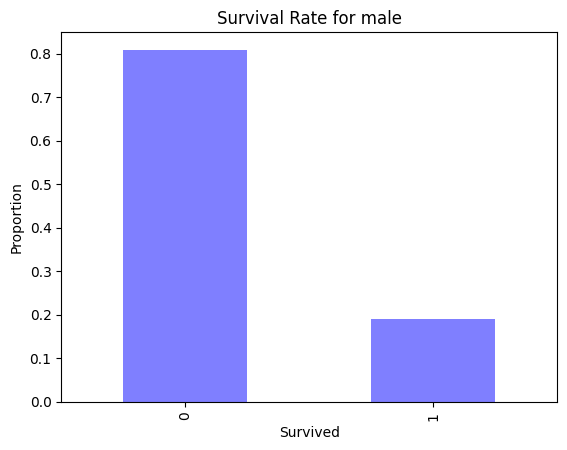

In [9]:
for sex in titanic_df['sex'].unique():
    titanic_df[titanic_df['sex'] == sex]['survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=['blue' if sex == 'male' else 'pink'])
    plt.title(f'Survival Rate for {sex}')
    plt.xlabel('Survived')
    plt.ylabel('Proportion')
    plt.show()


#### **Exercise 3:**

Examine your data for NAs.  For the features that you think are likely to matter given your initial analysis, use an imputer to fill in the missing values. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.

In [37]:
titanic_df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
titanic_df['age'] = imputer.fit_transform(titanic_df[['age']])
titanic_df['fare'] = imputer.fit_transform(titanic_df[['fare']])
titanic_df = titanic_df.dropna(subset=['embarked'])
titanic_df = titanic_df.drop(columns='cabin')

In [39]:
titanic_df.isnull().sum()

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
survived    0
dtype: int64

#### **Exercise 4**

Recall that sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [40]:
from sklearn.preprocessing import LabelEncoder

titanic_df_cleaned = titanic_df[['pclass','sex','age','sibsp','parch','survived']]
le = LabelEncoder()
titanic_df_cleaned['sex'] = le.fit_transform(titanic_df_cleaned[['sex']])
titanic_df_cleaned

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_5842/2360421150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_cleaned['sex'] = le.fit_transform(titanic_df_cleaned[['sex']])


,pclass,sex,age,sibsp,parch,survived
0,1,0,29.0000,0,0,1
1,1,1,0.9167,1,2,1
2,1,0,2.0000,1,2,0
3,1,1,30.0000,1,2,0
4,1,0,25.0000,1,2,0
...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,0
1305,3,0,28.0000,1,0,0
1306,3,1,26.5000,0,0,0
1307,3,1,27.0000,0,0,0


#### **Exercise 5**

Using 5-fold cross-validation, compare the performance of a LogisticRegression classifier with that of a DecisionTree classifier.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


X = titanic_df_cleaned[['pclass','sex','age','sibsp','parch']]
y = titanic_df_cleaned['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40) 

logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()

logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy of Logistic Regression: {accuracy_logistic:.3f}')

decision_tree_model.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_model.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f'Accuracy of Decision Tree: {accuracy_decision_tree:.3f}')

Accuracy of Logistic Regression: 0.802
Accuracy of Decision Tree: 0.802


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

lm = LogisticRegression()
X = titanic_df_cleaned[['pclass','sex','age','sibsp','parch']]
y = titanic_df['survived']

result = cross_val_score(lm, X=X, y=y, cv=5)
np.mean(result)

0.7092948436723114

In [44]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

dt = DecisionTreeClassifier()

X = titanic_df_cleaned[['pclass','sex','age','sibsp','parch']]
y = titanic_df['survived']

result = cross_val_score(dt, X=X, y=y, cv=5)
np.mean(result)


0.6358486151326372

_Note, the following exercises use the housing data introduced in this week's lecture notes._

#### **Exercise 6:** 

Using the housing data introduced with the end-to-end example this week, try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the [documentation](https://scikit-learn.org/stable/modules/svm.html) if you are interested). Use GridSearchCV to explore the parameter space. How does the best `SVR` predictor perform?

#### **Exercise 7:**

Try replacing the `GridSearchCV` with a `RandomizedSearchCV`.

#### **Exercise 8:**

Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes.  Use a `RandomForestRegressor` to drive the feature selection process.